# Reading Data

In [32]:
#!pip install pyspark

import pyspark

from pyspark.sql import SparkSession
# create spark session
spark = SparkSession.builder.master("local[*]").appName("Diabetes_Prediction").getOrCreate()

# Set log level to ERROR to ignore warnings
spark.sparkContext.setLogLevel("ERROR")

In [33]:
# from google.colab import files

# uploaded_files = files.upload()

# for filename in uploaded_files.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(name=filename, length=len(uploaded_files[filename])))

In [34]:
df = spark.read.csv("/Users/pamelacheng/Downloads/Emory/diabetes_012_health_indicators_BRFSS2015.csv", inferSchema = True, header = True)
df.show()

+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck| BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|
+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|         0.0|   1.0|     1.0|      1.0|40.0|   1.0|   0.0|                 0.0|         0.0|   0.0|    1.0|              0.0|          1.0|        0.0|    5.0|    18.0|    15.0|     1.0|0.0| 9.0|      4.0|   3.0|
|         0.0|   0.0|     0.0|      0.0|25.0|   1.0|   0.0|                 0.0|         1.0|   0.0|    0.0|              0.0|          0.0|    

In [35]:
from pyspark.sql.functions import when

df = df.withColumn("Diabetes_012", when(df["Diabetes_012"] == 2, 1).otherwise(df["Diabetes_012"]))

# Show the modified DataFrame and print the schema to verify the changes
df.show()

+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|Diabetes_012|HighBP|HighChol|CholCheck| BMI|Smoker|Stroke|HeartDiseaseorAttack|PhysActivity|Fruits|Veggies|HvyAlcoholConsump|AnyHealthcare|NoDocbcCost|GenHlth|MentHlth|PhysHlth|DiffWalk|Sex| Age|Education|Income|
+------------+------+--------+---------+----+------+------+--------------------+------------+------+-------+-----------------+-------------+-----------+-------+--------+--------+--------+---+----+---------+------+
|         0.0|   1.0|     1.0|      1.0|40.0|   1.0|   0.0|                 0.0|         0.0|   0.0|    1.0|              0.0|          1.0|        0.0|    5.0|    18.0|    15.0|     1.0|0.0| 9.0|      4.0|   3.0|
|         0.0|   0.0|     0.0|      0.0|25.0|   1.0|   0.0|                 0.0|         1.0|   0.0|    0.0|              0.0|          0.0|    

# Data Exploration

In [36]:
for i in df.dtypes:
    print(i)

num_double_cols = len([field for field in df.dtypes if field[1] == 'double'])
print("Number of double variables:", num_double_cols)

('Diabetes_012', 'double')
('HighBP', 'double')
('HighChol', 'double')
('CholCheck', 'double')
('BMI', 'double')
('Smoker', 'double')
('Stroke', 'double')
('HeartDiseaseorAttack', 'double')
('PhysActivity', 'double')
('Fruits', 'double')
('Veggies', 'double')
('HvyAlcoholConsump', 'double')
('AnyHealthcare', 'double')
('NoDocbcCost', 'double')
('GenHlth', 'double')
('MentHlth', 'double')
('PhysHlth', 'double')
('DiffWalk', 'double')
('Sex', 'double')
('Age', 'double')
('Education', 'double')
('Income', 'double')
Number of double variables: 22


EDA

In [37]:
# prompt: check for missing values for each column in df

# Check for missing values for each column in df
for col in df.columns:
  missing_values = df.filter(df[col].isNull()).count()
  if missing_values > 0:
    print(f"Missing values in column {col}: {missing_values}")
  else:
    print(f"{col}: No missing value.")


Diabetes_012: No missing value.
HighBP: No missing value.
HighChol: No missing value.
CholCheck: No missing value.
BMI: No missing value.
Smoker: No missing value.
Stroke: No missing value.
HeartDiseaseorAttack: No missing value.
PhysActivity: No missing value.
Fruits: No missing value.
Veggies: No missing value.
HvyAlcoholConsump: No missing value.
AnyHealthcare: No missing value.
NoDocbcCost: No missing value.
GenHlth: No missing value.
MentHlth: No missing value.
PhysHlth: No missing value.
DiffWalk: No missing value.
Sex: No missing value.
Age: No missing value.
Education: No missing value.
Income: No missing value.


In [38]:
df.describe().show()



+-------+-------------------+------------------+-------------------+------------------+------------------+-------------------+-------------------+--------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+
|summary|       Diabetes_012|            HighBP|           HighChol|         CholCheck|               BMI|             Smoker|             Stroke|HeartDiseaseorAttack|      PhysActivity|            Fruits|            Veggies|  HvyAlcoholConsump|      AnyHealthcare|        NoDocbcCost|           GenHlth|          MentHlth|          PhysHlth|           DiffWalk|                Sex|              Age|         Education|            Income|
+-------+-------------------+------------------+-------------------+------------------+------------------+----------------

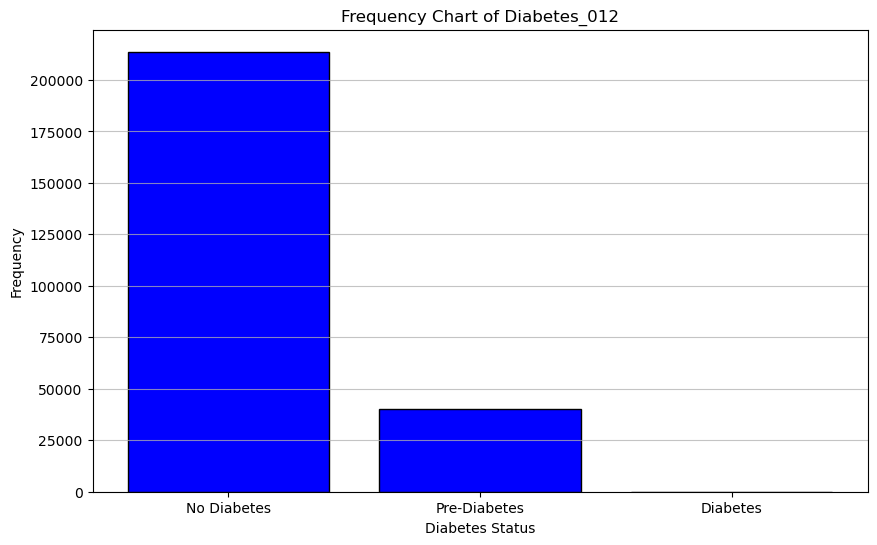

In [39]:
import matplotlib.pyplot as plt

# Collect the column data
data = df.select('Diabetes_012').rdd.flatMap(lambda x: x).collect()

# Plot the histogram
plt.figure(figsize=(10, 6))
# Set bins to the edges of the categories for values 0 and 1
bins_edges = [-0.5, 0.5, 1.5, 2.5]
plt.hist(data, bins=bins_edges, color='blue', edgecolor='black', rwidth=0.8)
plt.title('Frequency Chart of Diabetes_012')
plt.xlabel('Diabetes Status')
plt.ylabel('Frequency')
# Set ticks to the center of each bin for the two categories
plt.xticks(ticks=[0, 1, 2], labels=['No Diabetes', 'Pre-Diabetes', 'Diabetes'])
plt.grid(axis='y', alpha=0.75)
plt.show()


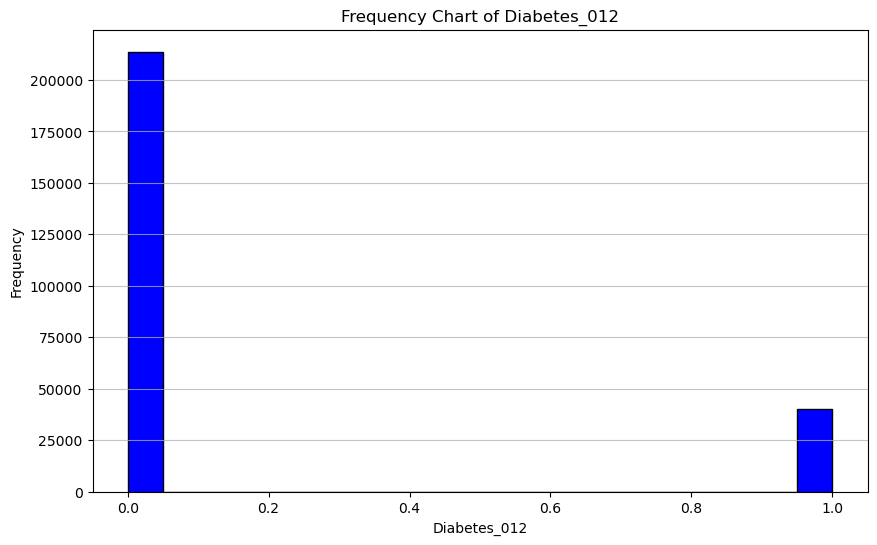

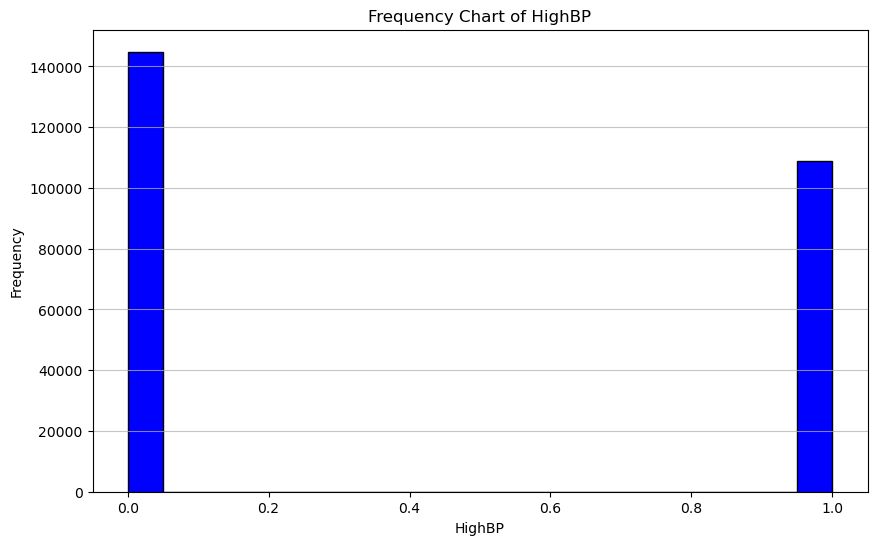

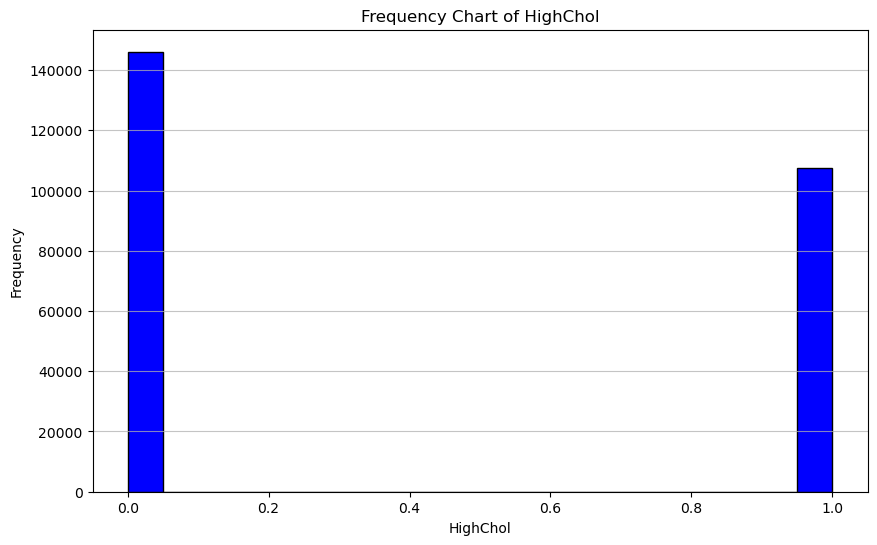

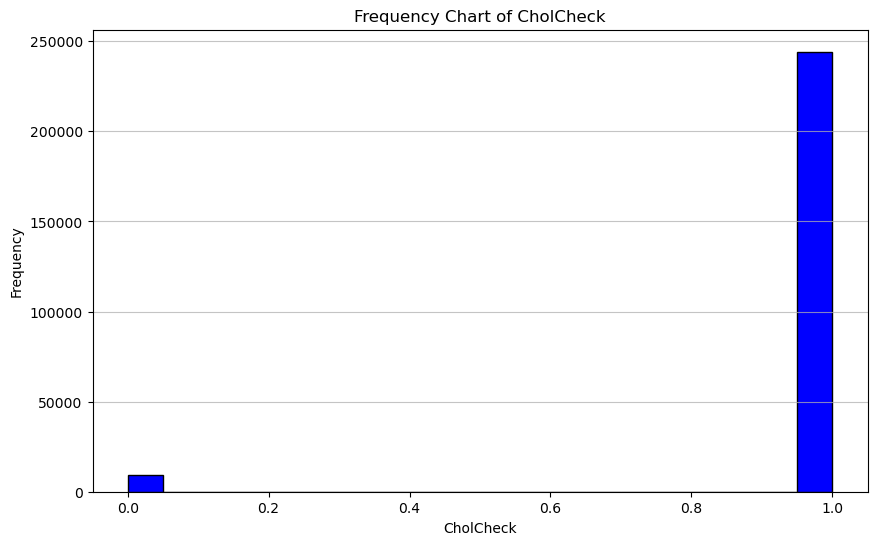

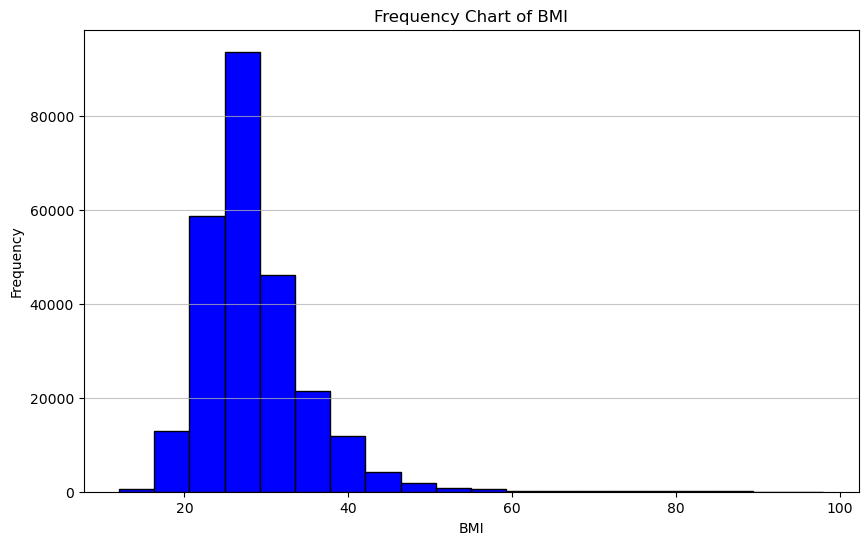

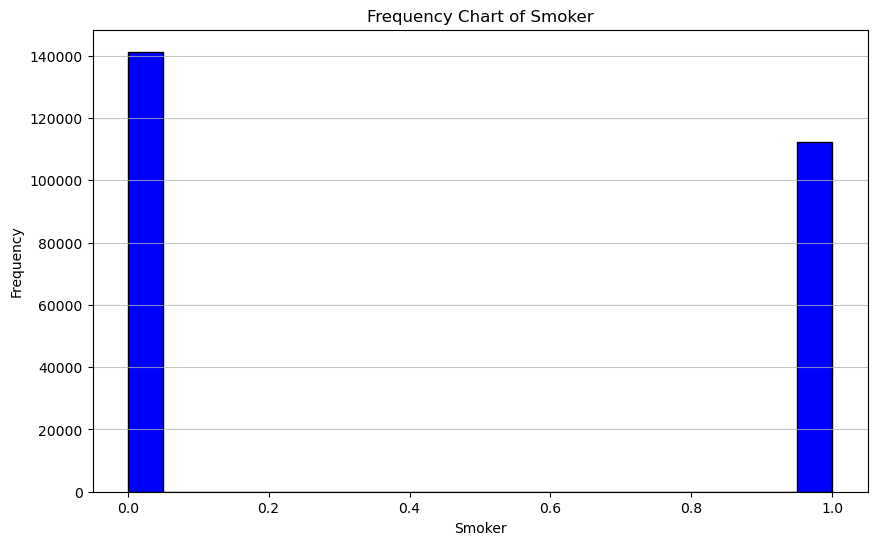

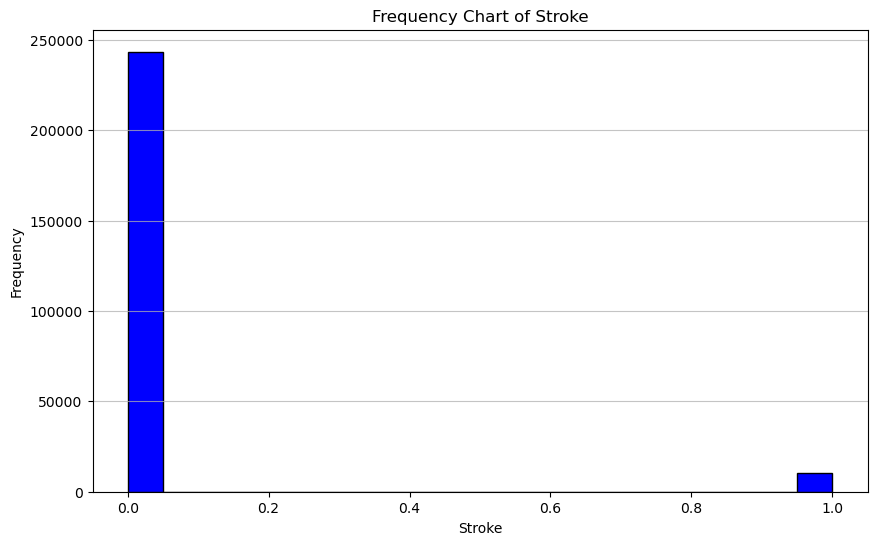

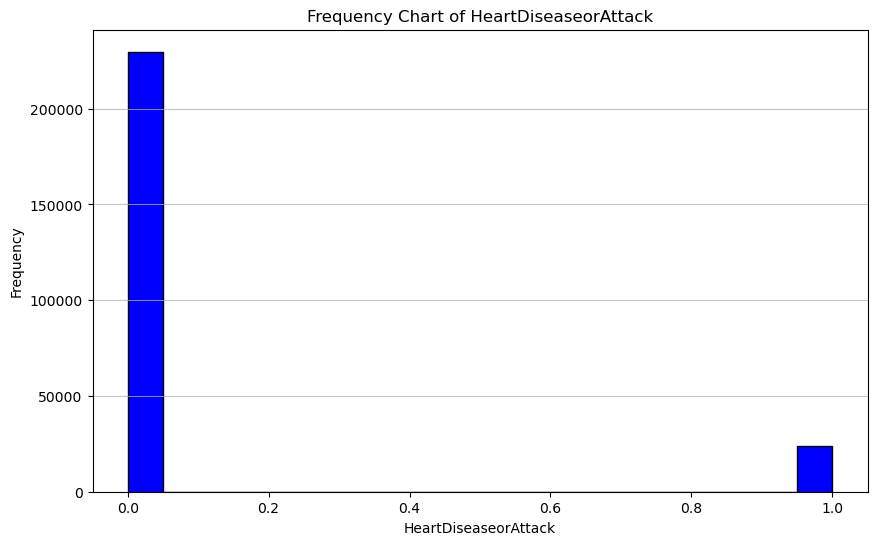

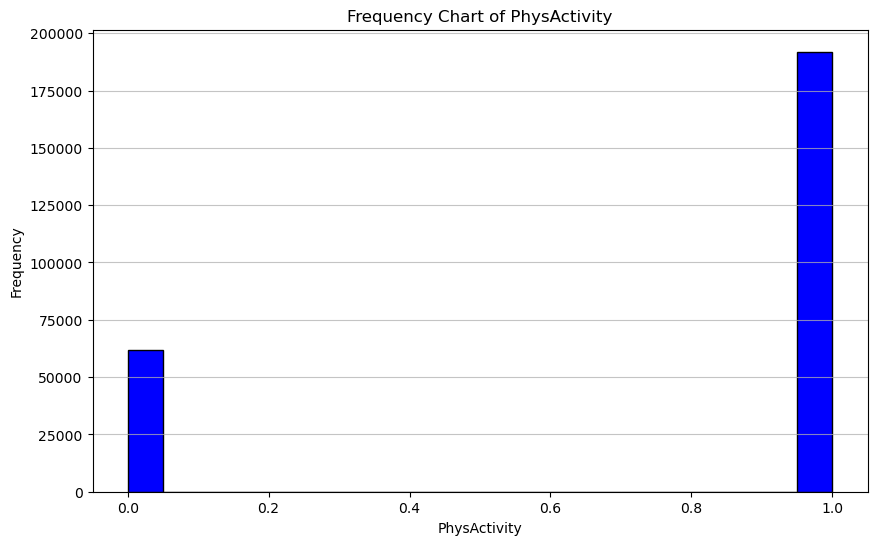

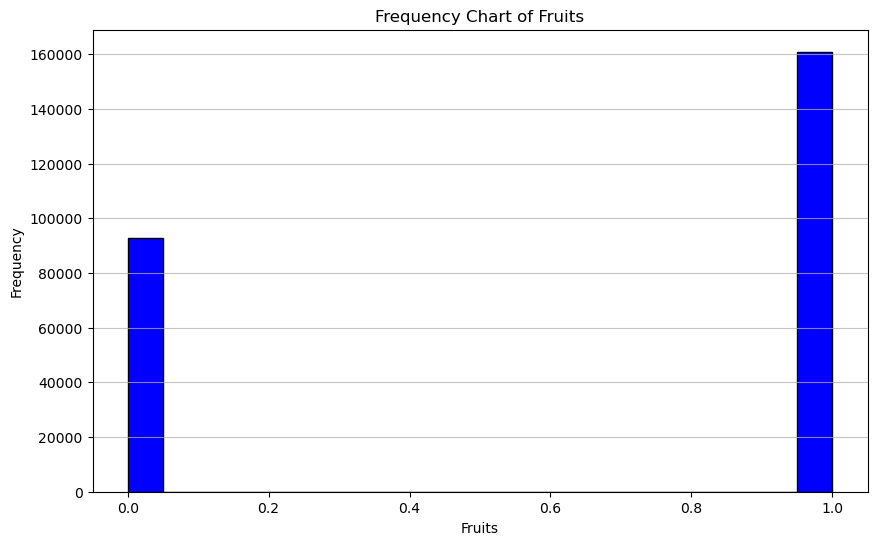

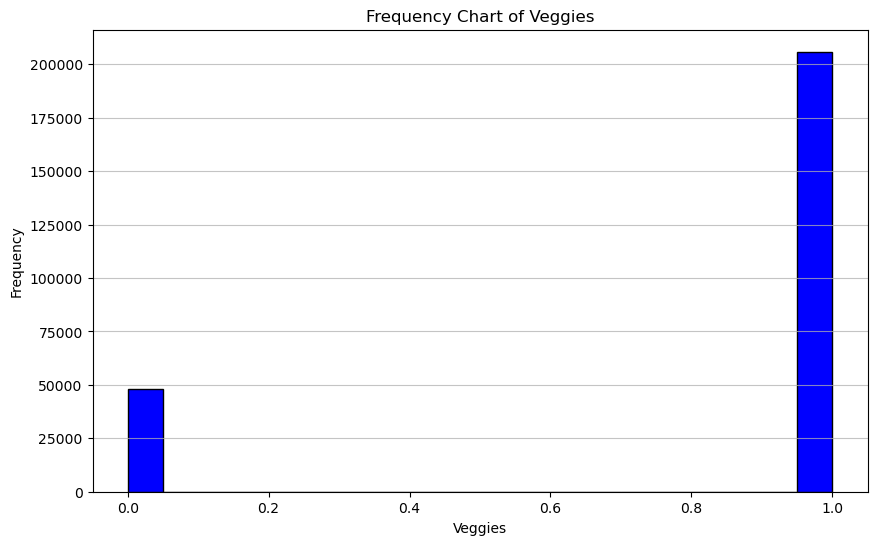

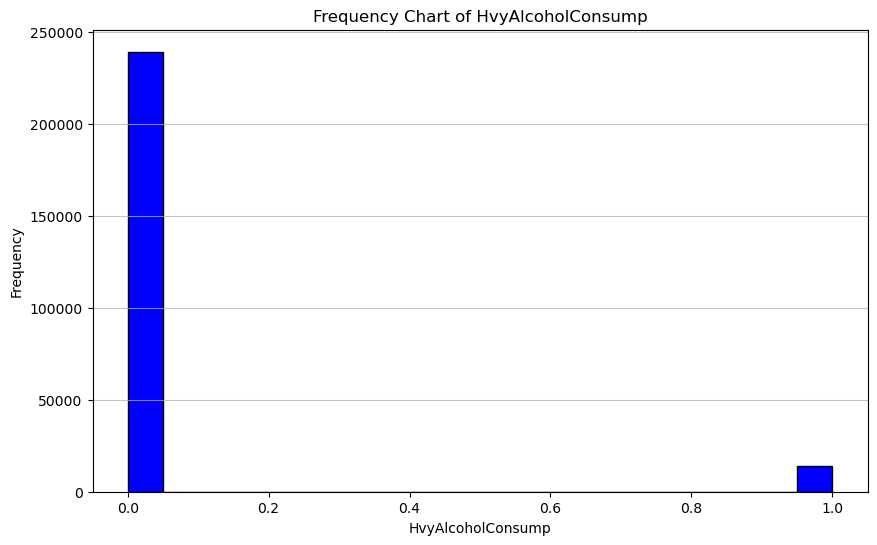

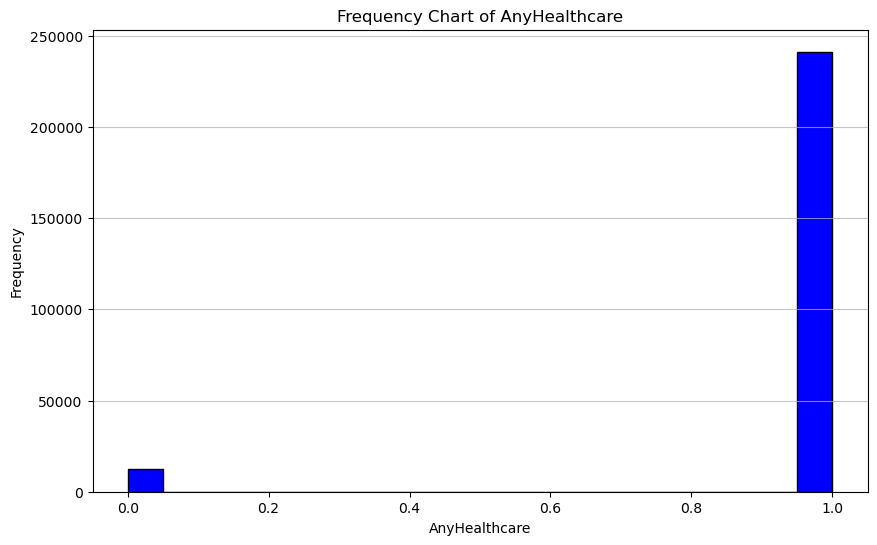

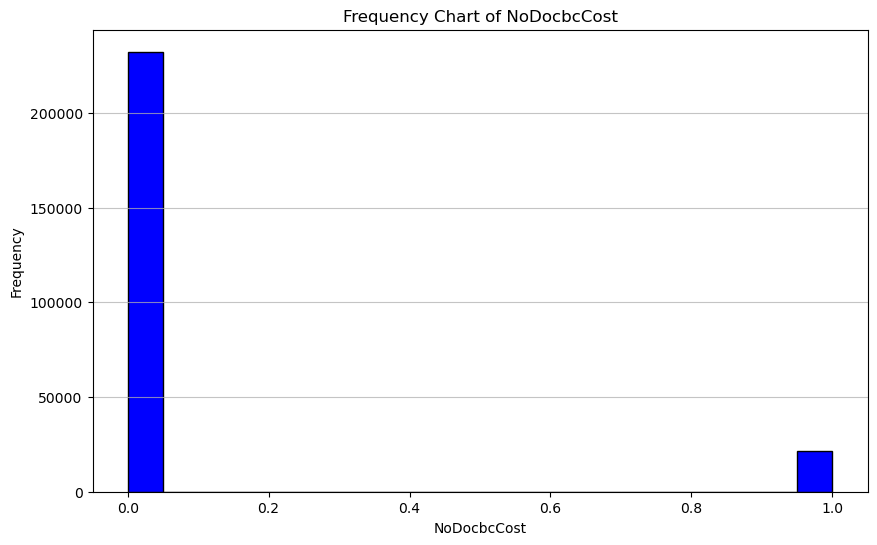

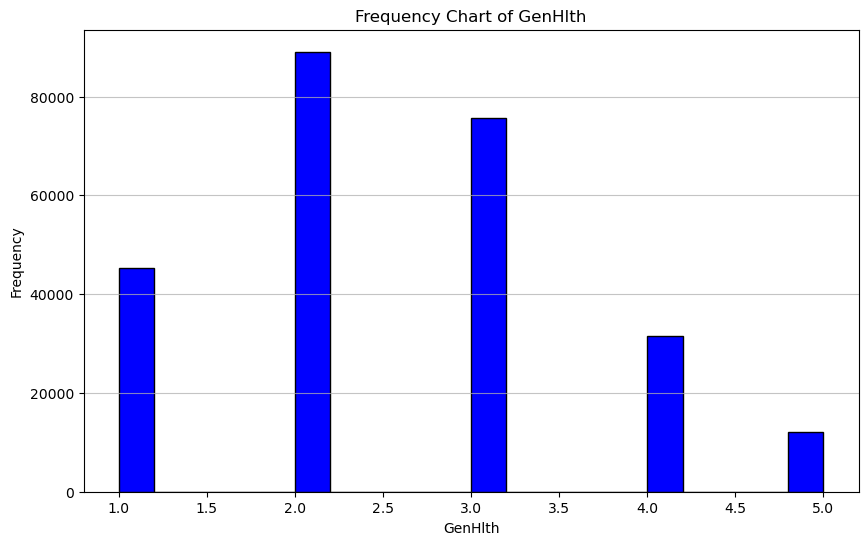

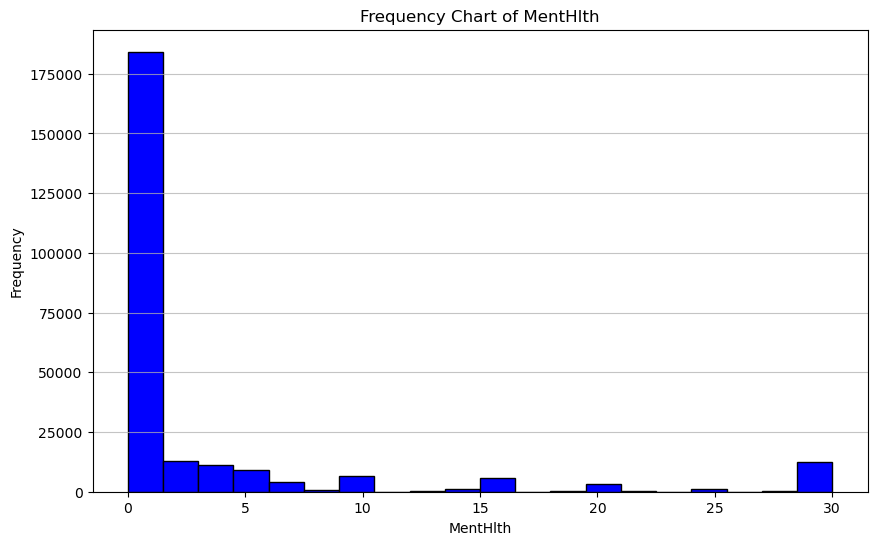

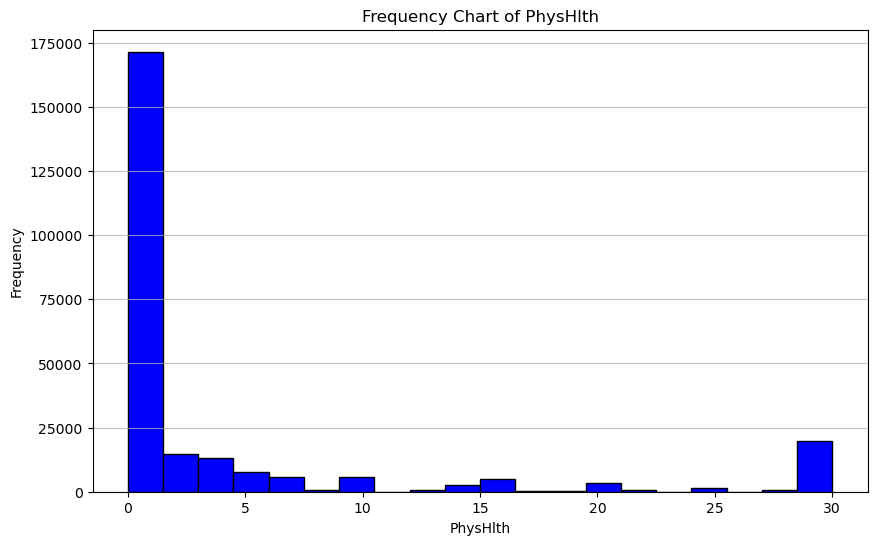

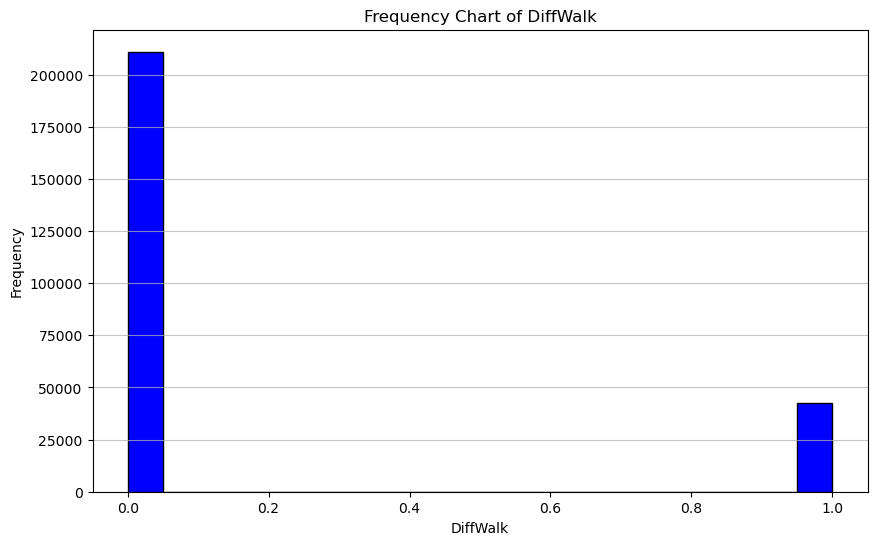

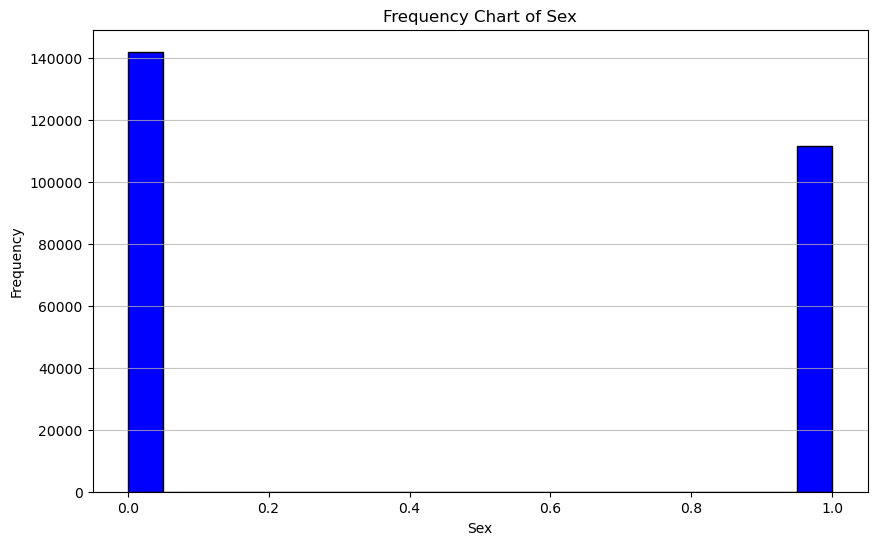

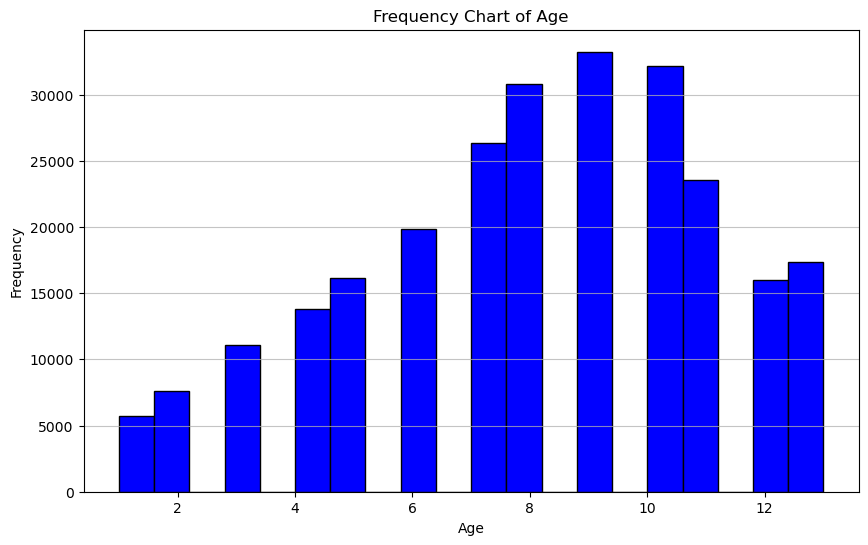

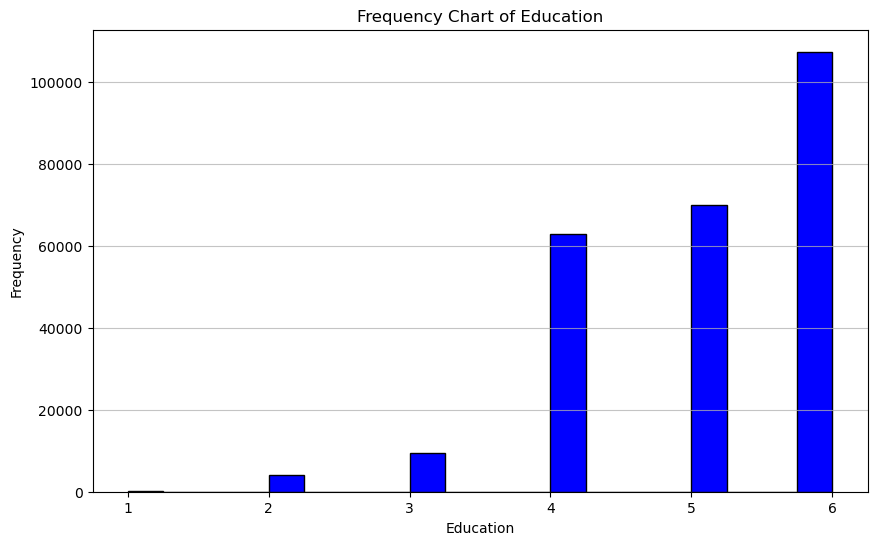

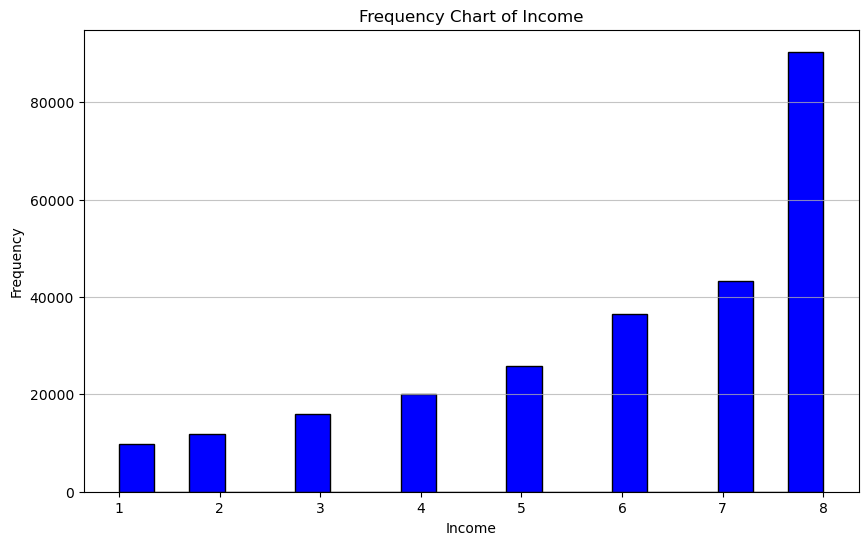

In [40]:
import matplotlib.pyplot as plt

for column in df.columns:
    # Collect the column data
    data = df.select(column).rdd.flatMap(lambda x: x).collect()

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=20, color='blue', edgecolor='black')
    plt.title(f'Frequency Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.75)
    plt.show()


## resample: ovesample class 1

In [41]:
# Splitting the DataFrame into three separate DataFrames based on the class
df_class_0 = df.filter(df.Diabetes_012 == 0)
df_class_1 = df.filter(df.Diabetes_012 == 1)

In [42]:
original_count_class_0 = df_class_0.count()


# Calculate the target count for class '1' to be 90% of class '0's count
target_count_class_1 = int(original_count_class_0 * 0.9)

# Recalculate the replication factor for class '1' based on its new target count
original_count_class_1 = df_class_1.count()
replication_factor_class_1 = max(5, target_count_class_1 // original_count_class_1)  # Ensure at least 1

# Replicate rows of class '1' to reach the new target count
from pyspark.sql.functions import explode, array, lit

df_class_1_replicated = df_class_1.withColumn("replicate", explode(array([lit(x) for x in range(replication_factor_class_1)]))).drop("replicate")

df_balanced = df_class_0.unionAll(df_class_1_replicated)
# Display the count of each class in the balanced dataset
df_balanced.groupBy('Diabetes_012').count().show()

df = df_balanced
df.groupBy('Diabetes_012').count().show()

+------------+------+
|Diabetes_012| count|
+------------+------+
|         0.0|213703|
|         1.0|199885|
+------------+------+

+------------+------+
|Diabetes_012| count|
+------------+------+
|         0.0|213703|
|         1.0|199885|
+------------+------+



In [43]:
# df_balanced = df_class_0.unionAll(df_class_1_replicated)
# # Display the count of each class in the balanced dataset
# df_balanced.groupBy('Diabetes_012').count().show()

Multicollinearity Check

In [44]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col

In [45]:
# List of columns to consider for correlation analysis
feature_columns = [col for col in df.columns]

# Assemble the feature columns into a single vector column
vector_col = "features"
assembler = VectorAssembler(inputCols=feature_columns, outputCol=vector_col)
df_vector = assembler.transform(df).select(vector_col)

In [46]:
# Calculate the correlation matrix
correlation_matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]

# Convert to a Python array for easier manipulation
correlation_array = correlation_matrix.toArray()

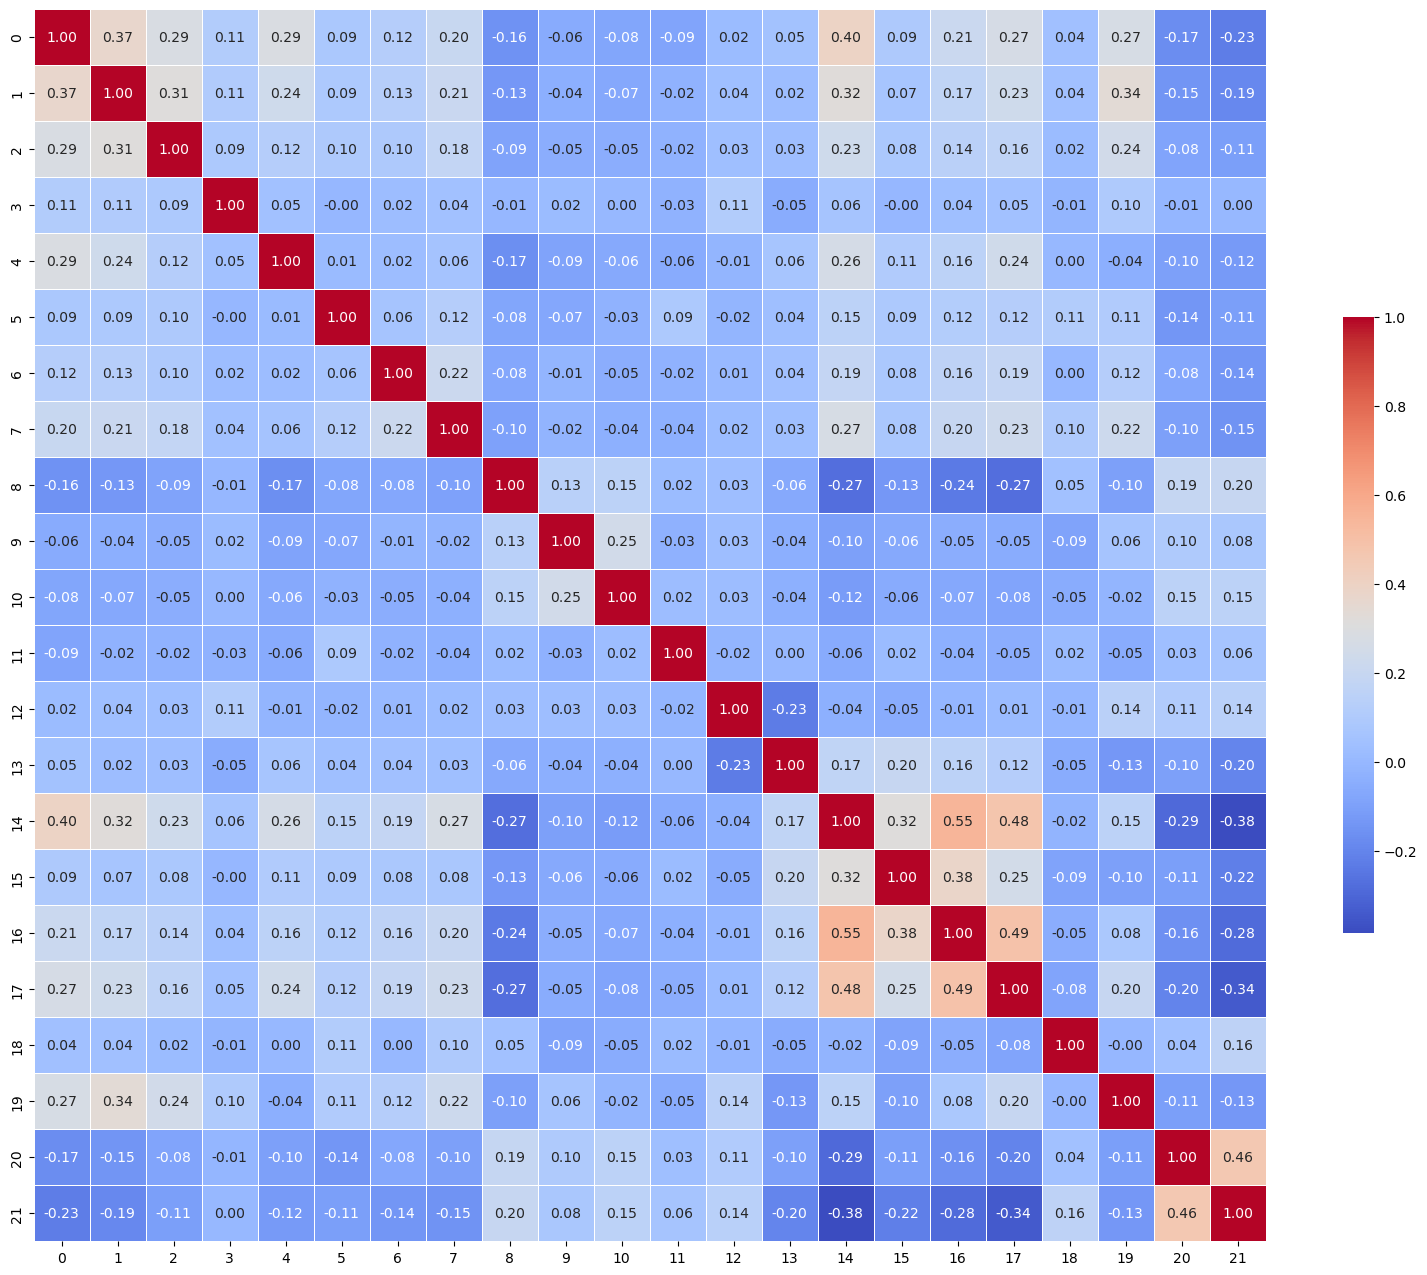

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,16))
sns.heatmap(correlation_array, annot=True, fmt=".2f", cmap='coolwarm',
            square = True, linewidths=0.5, cbar_kws={"shrink": 0.5})

plt.show()

# Data Preprocessing

Convert Target Variable to Categorical

One-hot Encoding is not neccessary since it is already label encoded.

In [48]:
# from pyspark.ml.feature import OneHotEncoder

# # Define the encoder for the list of columns
# encoder = OneHotEncoder(inputCols=["GenHlth", "Age", "Education"],
#                         outputCols=[f"{col}_encoded" for col in ["GenHlth", "Age", "Education"]])

# # Transform the DataFrame using the encoder
# df_encoded = encoder.transform(df)

# # Show the resulting DataFrame
# df_encoded.select([f"{col}_encoded" for col in ["GenHlth", "Age", "Education"]]).show()


Standardize numeric value

In [49]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import VectorAssembler

# Define the numerical columns
numerical_columns = ["BMI", "GenHlth", "MentHlth", "PhysHlth", "Age"]

# Assemble the numerical columns into a vector
assembler = VectorAssembler(inputCols=numerical_columns, outputCol="numerical_features")

# Initialize the MinMaxScaler
scaler = MinMaxScaler(inputCol="numerical_features", outputCol="scaled_features")

# Create a pipeline with the VectorAssembler and MinMaxScaler
pipeline = Pipeline(stages=[assembler, scaler])

# Fit the pipeline to the data
pipeline_model = pipeline.fit(df)

# Transform the data
df_scaled = pipeline_model.transform(df)

# Show the resulting DataFrame
df_scaled.select("scaled_features").show(truncate=False)


+---------------------------------------------------------------------+
|scaled_features                                                      |
+---------------------------------------------------------------------+
|[0.32558139534883723,1.0,0.6,0.5,0.6666666666666666]                 |
|[0.1511627906976744,0.5,0.0,0.0,0.5]                                 |
|[0.18604651162790697,1.0,1.0,1.0,0.6666666666666666]                 |
|[0.1744186046511628,0.25,0.0,0.0,0.8333333333333333]                 |
|[0.13953488372093023,0.25,0.1,0.0,0.8333333333333333]                |
|[0.1511627906976744,0.25,0.0,0.06666666666666667,0.75]               |
|[0.20930232558139533,0.5,0.0,0.4666666666666667,0.6666666666666666]  |
|[0.1511627906976744,0.5,0.0,0.0,0.8333333333333333]                  |
|[0.13953488372093023,0.25,0.0,0.0,0.5833333333333333]                |
|[0.2558139534883721,0.5,0.0,1.0,0.75]                                |
|[0.16279069767441862,0.5,0.0,0.5,0.5]                          

In [50]:
from pyspark.ml.feature import VectorAssembler

# List of boolean columns in your DataFrame
boolean_columns = ["HighBP", "HighChol", "Smoker", "Stroke", "PhysActivity", "Fruits", "Veggies", "HvyAlcoholConsump", "AnyHealthcare", "NoDocbcCost", "DiffWalk", "Sex"]

# Include the 'scaled_features' with the boolean columns
assembler = VectorAssembler(inputCols=boolean_columns + ["scaled_features"], outputCol="features")

# Transform the DataFrame
df = assembler.transform(df_scaled)


In [51]:
df.head()

Row(Diabetes_012=0.0, HighBP=1.0, HighChol=1.0, CholCheck=1.0, BMI=40.0, Smoker=1.0, Stroke=0.0, HeartDiseaseorAttack=0.0, PhysActivity=0.0, Fruits=0.0, Veggies=1.0, HvyAlcoholConsump=0.0, AnyHealthcare=1.0, NoDocbcCost=0.0, GenHlth=5.0, MentHlth=18.0, PhysHlth=15.0, DiffWalk=1.0, Sex=0.0, Age=9.0, Education=4.0, Income=3.0, numerical_features=DenseVector([40.0, 5.0, 18.0, 15.0, 9.0]), scaled_features=DenseVector([0.3256, 1.0, 0.6, 0.5, 0.6667]), features=DenseVector([1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.3256, 1.0, 0.6, 0.5, 0.6667]))

# Model Exploration

Decision Tree

In [52]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [53]:
from pyspark.sql.functions import col
df = df.withColumn("Diabetes_012", col("Diabetes_012").cast("integer"))

# # split the data into training and testing sets
(training_data, testing_data) = df.randomSplit([0.7, 0.3], seed=1234)


In [54]:
# Display the schema to confirm the change
df.printSchema()

from pyspark.ml.classification import DecisionTreeClassifier

# Decision tree classifier setup
dt = DecisionTreeClassifier(labelCol='Diabetes_012', featuresCol='features', seed=42)

# Train the model on the training set
model = dt.fit(training_data)

# Make predictions on the testing set
predictions = model.transform(testing_data)


root
 |-- Diabetes_012: integer (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)
 |-- numerical_features: vector (nullable = true)
 |-- scaled_features: vector (nullable = true)
 |-- 

In [55]:
# evaluate the performance of the model
evaluator = MulticlassClassificationEvaluator(labelCol='Diabetes_012', predictionCol='prediction', metricName='weightedRecall')
accuracy = evaluator.evaluate(predictions)
print('Decision Tree Classifier recall: {:.2f}'.format(accuracy))

Decision Tree Classifier recall: 0.73


In [56]:
from pyspark.sql.functions import col

# Ensure both prediction and label are of type double
predictions = predictions.withColumn("prediction", col("prediction").cast("double")) \
                         .withColumn("Diabetes_012", col("Diabetes_012").cast("double"))

# Convert DataFrame to an RDD of tuple (prediction, label)
predictions_and_labels_rdd = predictions.select(['prediction', 'Diabetes_012']) \
                                        .rdd \
                                        .map(lambda row: (row['prediction'], row['Diabetes_012']))

# Now you can use MulticlassMetrics without the type error
from pyspark.mllib.evaluation import MulticlassMetrics
metrics = MulticlassMetrics(predictions_and_labels_rdd)

confusion_matrix = metrics.confusionMatrix().toArray()
print("Confusion Matrix:\n", confusion_matrix)

/Users/pamelacheng/anaconda3/lib/python3.11/site-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Confusion Matrix:
 [[45160. 18930.]
 [15050. 44757.]]


In [57]:
for label in sorted(predictions.select('Diabetes_012').distinct().rdd.map(lambda x: x[0]).collect()):
    print("Class %s precision: %s" % (label, metrics.precision(label)))
    print("Class %s recall: %s" % (label, metrics.recall(label)))
    print("Class %s F1 Measure: %s" % (label, metrics.fMeasure(label, beta=1.0)))


Class 0.0 precision: 0.7500415213419698
Class 0.0 recall: 0.7046341082852239
Class 0.0 F1 Measure: 0.7266291230893
Class 1.0 precision: 0.7027650854962552
Class 1.0 recall: 0.7483572157105356
Class 1.0 F1 Measure: 0.7248449317375742


In [58]:
from pyspark.sql.functions import explode, array, lit
from pyspark.mllib.evaluation import MulticlassMetrics

best_recall = 0
best_proportion = None

for proportion in np.arange(0.1, 1.1, 0.1):  # Example: test proportions from 10% to 100%
    target_count_class_1 = int(original_count_class_0 * proportion)
    replication_factor_class_1 = max(1, target_count_class_1 // original_count_class_1)
    
    df_class_1_replicated = df_class_1.withColumn(
        "replicate",
        explode(array([lit(x) for x in range(replication_factor_class_1)]))
    ).drop("replicate")
    
    df_balanced = df_class_0.unionAll(df_class_1_replicated)
    
    # Train your model here with df_balanced
    # model = ... (code to train model)
    # predictions = model.transform(validation_data)
    
    # Calculate recall
    predictions_and_labels_rdd = predictions.select(['prediction', 'Diabetes_012']) \
                                            .rdd \
                                            .map(lambda row: (row['prediction'], row['Diabetes_012']))
    metrics = MulticlassMetrics(predictions_and_labels_rdd)
    recall = metrics.recall(1.0)
    
    print(f"Proportion: {proportion}, Recall: {recall}")
    
    # Store the best recall and proportion
    if recall > best_recall:
        best_recall = recall
        best_proportion = proportion

print(f"Best recall of {best_recall} achieved with proportion {best_proportion}.")


Proportion: 0.1, Recall: 0.7483572157105356


Proportion: 0.2, Recall: 0.7483572157105356


Proportion: 0.30000000000000004, Recall: 0.7483572157105356


Proportion: 0.4, Recall: 0.7483572157105356


Proportion: 0.5, Recall: 0.7483572157105356


Proportion: 0.6000000000000001, Recall: 0.7483572157105356


Proportion: 0.7000000000000001, Recall: 0.7483572157105356


Proportion: 0.8, Recall: 0.7483572157105356


Proportion: 0.9, Recall: 0.7483572157105356


Proportion: 1.0, Recall: 0.7483572157105356
Best recall of 0.7483572157105356 achieved with proportion 0.1.


In [59]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml import Pipeline

# Initialize the Decision Tree Classifier
dt = DecisionTreeClassifier(labelCol='Diabetes_012', featuresCol='features', seed=42)

# Create a Pipeline
pipeline = Pipeline(stages=[dt])

# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [5, 10, 20])
             .addGrid(dt.minInstancesPerNode, [1, 2, 4])
             .build())

# Setup the evaluator for cross-validation
evaluator = MulticlassClassificationEvaluator(labelCol='Diabetes_012', predictionCol='prediction', metricName='weightedRecall')

# Setup CrossValidator
cv = CrossValidator(estimator=pipeline,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=5)  # Use 3+ folds in practice

# Fit the model using CrossValidator
cvModel = cv.fit(training_data)

# Fetch the best model
bestModel = cvModel.bestModel

# Make predictions on the test data
predictions = bestModel.transform(testing_data)

# Calculate the recall for the best model
recall = evaluator.evaluate(predictions)
print("Best Model Recall (Weighted): {:.2f}".format(recall))

# Fetch and print the best model's parameters
bestParams = bestModel.stages[-1].extractParamMap()
for param, value in bestParams.items():
    print(f"{param.name}: {value}")


Best Model Recall (Weighted): 0.83
cacheNodeIds: False
checkpointInterval: 10
featuresCol: features
impurity: gini
labelCol: Diabetes_012
leafCol: 
maxBins: 32
maxDepth: 20
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
minWeightFractionPerNode: 0.0
predictionCol: prediction
probabilityCol: probability
rawPredictionCol: rawPrediction
seed: 42


In [60]:
# # Rebuilding the Decision Tree model with the identified best parameters
# dt_best = DecisionTreeClassifier(labelCol='Diabetes_012', featuresCol='features',
#                                  maxDepth=5, minInstancesPerNode=1, seed=42)
dt_best = DecisionTreeClassifier(
    labelCol='Diabetes_012',
    featuresCol='features',
    maxDepth=20,  # Adjusted based on the best parameters
    maxBins=32,
    minInstancesPerNode=1,
    impurity='gini',
    seed=42,
    cacheNodeIds=False,
    checkpointInterval=10,
    maxMemoryInMB=256,
    minInfoGain=0.0,
    minWeightFractionPerNode=0.0,
    leafCol='',  # This is left empty as it seems to be the default in your output
    predictionCol='prediction',
    probabilityCol='probability',
    rawPredictionCol='rawPrediction'
)

# Train the model on the training set with the best parameters
model_best = dt_best.fit(training_data)

# Make predictions on the testing set with the best model
predictions_best = model_best.transform(testing_data)


In [61]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.types import FloatType

# Convert predictions to an RDD needed by MulticlassMetrics
predictions_and_labels = predictions_best.select(['prediction', 'Diabetes_012']).rdd.map(lambda lp: (float(lp.prediction), float(lp.Diabetes_012)))

# Instantiate metrics object
metrics = MulticlassMetrics(predictions_and_labels)

for label in sorted([0, 1]):
    print(f"Class {label} precision: {metrics.precision(float(label))}")
    print(f"Class {label} recall: {metrics.recall(float(label))}")
    print(f"Class {label} F1 Measure: {metrics.fMeasure(float(label), 1.0)}")



Class 0 precision: 0.8890702931572715
Class 0 recall: 0.773209549071618
Class 0 F1 Measure: 0.8271021797910337
Class 1 precision: 0.7867486318754676
Class 1 recall: 0.8966174528065277
Class 1 F1 Measure: 0.8380976196802276


Random Forest

In [62]:
from pyspark.ml.classification import RandomForestClassifier

# Random Forest classifier setup
rf = RandomForestClassifier(labelCol='Diabetes_012', featuresCol='features', seed=42)

# Train the model on the training set
rf_model = rf.fit(training_data)

# Make predictions on the testing set
rf_predictions = rf_model.transform(testing_data)

In [63]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Setup the evaluator
evaluator = MulticlassClassificationEvaluator(labelCol='Diabetes_012', predictionCol='prediction', metricName='weightedRecall')

# Evaluate accuracy
rf_recall = evaluator.evaluate(rf_predictions)
print(f'Random Forest Classifier Recall Rate: {rf_recall:.2f}')


Random Forest Classifier Recall Rate: 0.73


In [64]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

# Ensure the predictions and labels are in the correct format (float)
rf_predictions = rf_predictions.withColumn("prediction", col("prediction").cast("float")).withColumn("Diabetes_012", col("Diabetes_012").cast("float"))

# Convert to RDD using .rdd.map()
predictions_and_labels = rf_predictions.select(['prediction', 'Diabetes_012']).rdd.map(lambda r: (r[0], r[1]))

# Instantiate metrics object
metrics = MulticlassMetrics(predictions_and_labels)

# Calculate and print metrics for classes 0 and 1
for label in sorted([0, 1]):
    precision = metrics.precision(label)
    recall = metrics.recall(label)

    # Manually calculate F1 score if precision + recall is not zero
    if precision + recall != 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0.0

    print(f"Class {label} precision: {precision}")
    print(f"Class {label} recall: {recall}")
    print(f"Class {label} F1 Measure: {f1}")


Class 0 precision: 0.7437280521370496
Class 0 recall: 0.7336089873615229
Class 0 F1 Measure: 0.7386338643290289
Class 1 precision: 0.7186341238319682
Class 1 recall: 0.7291119768588961
Class 1 F1 Measure: 0.7238351343724582


In [65]:
from pyspark.ml.tuning import ParamGridBuilder

# Start a new Spark session with sufficient resources
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("RandomForestTuning").getOrCreate()

paramGrid = (ParamGridBuilder()
             .addGrid(rf.numTrees, [5, 10, 20])  # Number of trees
             .addGrid(rf.maxDepth, [5, 10])  # Maximum depth of each tree
             .build())

from pyspark.ml.tuning import CrossValidator

cv = CrossValidator(estimator=rf,
                    estimatorParamMaps=paramGrid,
                    evaluator=evaluator,
                    numFolds=5,  # Number of folds for cross-validation
                    parallelism=2)  # Evaluate up to 2 parameter settings in parallel (adjust based on your cluster)


In [66]:
# Fit the model using CrossValidator
cvModel = cv.fit(training_data)

# Fetch the best model
bestRFModel = cvModel.bestModel

In [67]:
# Make predictions on the test data
bestRFPredictions = bestRFModel.transform(testing_data)

# Evaluate accuracy
rf_bestrecall = evaluator.evaluate(bestRFPredictions)
print(f'Best Random Forest Classifier Recall: {rf_bestrecall:.2f}')


# Print the best model's parameters
bestParams = bestRFModel.extractParamMap()
for param, value in bestParams.items():
    print(f"{param.name}: {value}")

Best Random Forest Classifier Recall: 0.75
bootstrap: True
cacheNodeIds: False
checkpointInterval: 10
featureSubsetStrategy: auto
featuresCol: features
impurity: gini
labelCol: Diabetes_012
leafCol: 
maxBins: 32
maxDepth: 10
maxMemoryInMB: 256
minInfoGain: 0.0
minInstancesPerNode: 1
minWeightFractionPerNode: 0.0
numTrees: 20
predictionCol: prediction
probabilityCol: probability
rawPredictionCol: rawPrediction
seed: 42
subsamplingRate: 1.0


In [68]:
from pyspark.ml.classification import RandomForestClassifier

# Setup Random Forest classifier with the best parameters
rf_best = RandomForestClassifier(
    labelCol='Diabetes_012',
    featuresCol='features',
    maxDepth=10,
    maxBins=32,
    minInstancesPerNode=1,
    minInfoGain=0.0,
    numTrees=20,
    featureSubsetStrategy='auto',
    impurity='gini',
    maxMemoryInMB=256,
    seed=42,
    bootstrap=True,
    subsamplingRate=1.0
)

# Train the model on the training set
rf_best_model = rf_best.fit(training_data)

# Make predictions on the testing set
rf_best_predictions = rf_best_model.transform(testing_data)


In [69]:
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col

# Ensure the predictions and labels are in the correct format
rf_best_predictions = rf_best_predictions.withColumn("prediction", col("prediction").cast("float")).withColumn("Diabetes_012", col("Diabetes_012").cast("float"))

# Convert to RDD using .rdd.map()
predictions_and_labels = rf_best_predictions.select(['prediction', 'Diabetes_012']).rdd.map(lambda r: (r[0], r[1]))

# Instantiate metrics object
metrics = MulticlassMetrics(predictions_and_labels)

# Calculate and print metrics for classes 0 and 1
for label in sorted([0, 1]):
    precision = metrics.precision(float(label))
    recall = metrics.recall(float(label))
    # Manually calculate F1 score if precision + recall is not zero
    if precision + recall != 0:
        f1 = 2 * (precision * recall) / (precision + recall)
    else:
        f1 = 0.0
    
    print(f"Class {label} precision: {precision}")
    print(f"Class {label} recall: {recall}")
    print(f"Class {label} F1 Measure: {f1}")


Class 0 precision: 0.7741769461922866
Class 0 recall: 0.7275862068965517
Class 0 F1 Measure: 0.7501588603878606
Class 1 precision: 0.7257633827594873
Class 1 recall: 0.7725684284448309
Class 1 F1 Measure: 0.7484348551481723
